In [ ]:
!pip install -U fastai

In [ ]:
from fastai.text.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

In [ ]:
dir = Path("/content/drive/Shareddrives/CIS530/data")
list(dir.glob("*"))

[Path('/content/drive/Shareddrives/CIS530/data/games.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/games_details.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/ranking.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/teams.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/tweets.tar.gz'),
 Path('/content/drive/Shareddrives/CIS530/data/tweets'),
 Path('/content/drive/Shareddrives/CIS530/data/all_tweets.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/games_with2_team_tweets.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/Tweets_for_games_with2_team_tweets.csv'),
 Path('/content/drive/Shareddrives/CIS530/data/games_with_preprocessed_tweets_all.csv')]

In [ ]:
dls = TextDataLoaders.from_csv(path=dir, csv_fname="games_with_preprocessed_tweets_all.csv", 
                               text_col="ALL_TWEETS", label_col="HOME_TEAM_WINS")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)


In [ ]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.743032,0.693038,0.534077,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.688111,0.700077,0.509294,01:21
1,0.684460,0.688238,0.568773,01:21
2,0.670676,0.680607,0.584882,01:21
3,0.639171,0.695575,0.561338,01:21


SuggestedLRs(valley=2.75422871709452e-06)

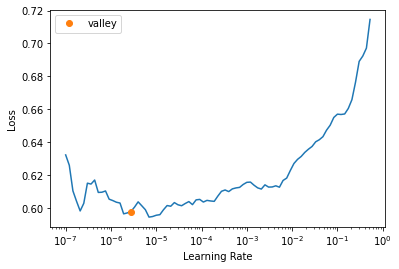

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 2.75422871709452e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.607418,0.691861,0.548947,00:37


epoch,train_loss,valid_loss,accuracy,time
0,0.604465,0.693587,0.560099,01:22
1,0.606925,0.694353,0.562577,01:22
2,0.605813,0.693410,0.558860,01:22
3,0.601789,0.694276,0.560099,01:22


In [ ]:
preds, targs = learn.get_preds()
x, y = learn.dls.valid_ds

ValueError: ignored

In [ ]:
??learn.dls.valid_ds

In [ ]:
dls.valid_ds[0][1]

TensorCategory(0)

In [ ]:
np.argmax(preds, axis=1)

AttributeError: ignored

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
f1_score(targs, np.argmax(preds, axis=1))

0.6740128558310376

In [ ]:
accuracy_score(targs, np.argmax(preds, axis=1))

0.5600991325898389